# Individual Project Planning Stage 

In [21]:
library(tidyverse)
library(dplyr)
library(RColorBrewer)

## 1. Data Description 
### Players:
* Number of Observations: **196**
* Number of Variables: **7**
* Variables: **experience, subscribe, hashedEmail, played_hours, name, gender, Age** 

Variable Description:
* **experience (chr):** The skill level of each player consisting: "Pro", "Veteran", "Regular", "Amateur", and "Beginner"
* **subscribe (lgl):** Whether the player has subscribed "to a game-related newsletter" or not consisiting of: "TRUE" and "FALSE"
* **hashedEmail (chr):** Emails addresses that have been tranformed into unique and unrecognizable characters
* **played_hours (dbl):** Total number of hours played per player ranging from 0 to 223.1
* **name (chr):** Name of the players
* **gender (chr):** Gender of the players consiting of: "Male", "Female", "Non-binary", "Two-Spirited", "Agender", and "Prefer not to say"
* **Age (dbl):** The ages of players ranging from 8 to 49 with two "N/A" observations 


### Sessions: 
* Number of Observations: **1535**
* Number of Variables: **5**
* Variables: **hashedEmail, start_time, end_time, original_start_time, original_end_time**

Variable Description: 
* **hashedEmail (chr):** Emails addresses that have been tranformed into unique and unrecognizable characters
* **start_time (chr):** Start time of the session including the day, month, year and time 
* **end_time (chr):** End time of the session including the day, month, year and time 
* **original_start_time (dbl):** The original start time recorded in Unix time (seconds since the Unix epoch, January 1st, 1970 while ignoring leap seconds)
* **original_end_time (dbl):** The original end time recorded in Unix time (seconds since the Unix epoch, January 1st, 1970 while ignoring leap seconds)

### Data Collection: 
* "a research group in Computer Science at UBC" collected "data about how people play video games"
* a MineCraft server was set up which recorded information about each player and individual sessions

### Potential Issues: 
* having hashed emails instead of players name in the sessions dataset can make it difficult to identify which session was played by which player
* The two "N/A" values in the Age column of the players dataset can interfere with calculating summary statistics
* the rounding in the original_start_time and original_end_time columns can interfere with accurate calculations of session length
* having both date and time in the start_time and end_time columns is considered untidy which could lead to mistakes in data manipulation as many R functions expect tidy data

**Sources:**

Data collection: https://canvas.ubc.ca/courses/153254/assignments/2055150?module_item_id=7644030 

Hashed email: https://www.mailmodo.com/guides/hashed-email-address/ 

Unix time: https://developer.mozilla.org/en-US/docs/Glossary/Unix_time 

## 2. Questions 

### Broad Question: 

What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? 

### Specific Question: 

Can 'experience" predict "subscribe" in the players dataset? 

Addressing the Question: 

To determine if "experience" can predict "subscribe" in the players data set, I intend to apply K-NN classification. The target variable would be "subscribe" and the predictor would be "experience". For example, if most of the K nearest players with similar experiences subscribed, the new player is predicted to subscribe. If most of the predictions made align with the actual subscription results this would indicate that "experience" can predict "subscribe". If the predictions do not align with the actual outcomes of "subscription" it could indicate that "experience" does not predict "subscription" or "experience" alone may not be the only factor that determines whether a player subscribes. I would then scale and center the data to standardize it and ensure that the prediction is accurate and not skewed. 



## 3. Exploratory Data Analysis and Visualization 

### Loading in the Data 

In [4]:
players_url <- "https://raw.githubusercontent.com/Alonso181006/dsci-100-2024w2-group-005-30/refs/heads/main/players.csv"

players <- read_csv(players_url)
players 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [5]:
sessions_url <- "https://raw.githubusercontent.com/Alonso181006/dsci-100-2024w2-group-005-30/refs/heads/main/sessions.csv"

sessions <- read_csv(sessions_url)
sessions 

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


### Wrangling: 

In [8]:
players <- na.omit(players) 
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


### Mean Values:

| mean played_hours  | mean Age |
|:-------------------|:---------|
| 5.90               | 20.52       

In [10]:
mean_hrs_played <- players |>
    summarize(mean_hrs_played = mean(played_hours, na.rm = TRUE))
mean_hrs_played 

mean_age <- players |>
    summarize(mean_age = mean(Age, na.rm = TRUE))
mean_age

mean_hrs_played
<dbl>
5.904639


mean_age
<dbl>
20.52062


### Exploratory Visualizations: 

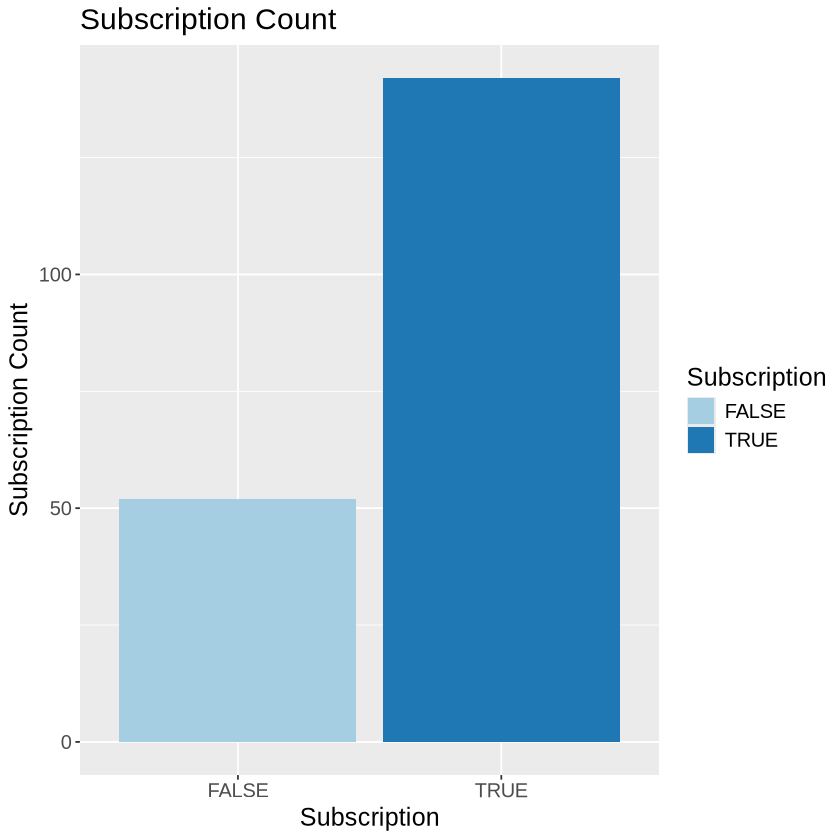

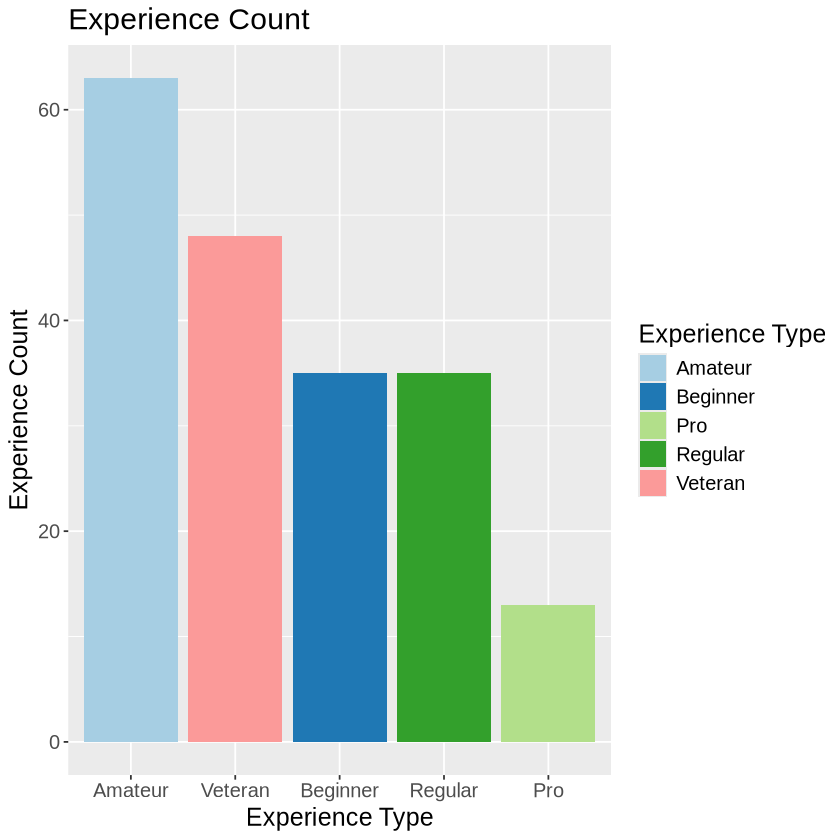

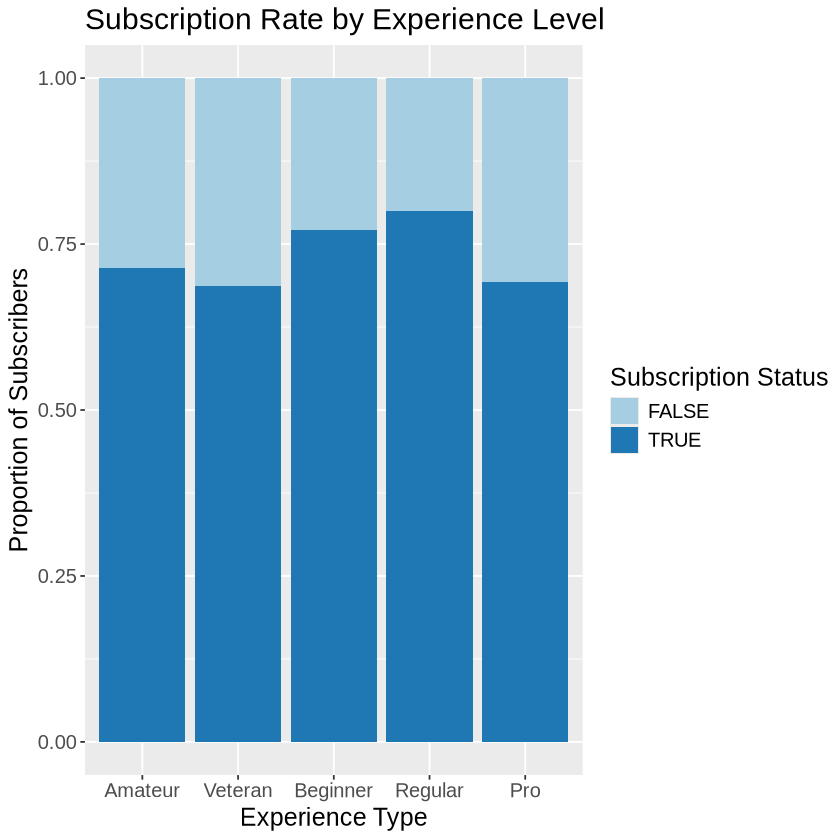

In [50]:
# subscribe bar graph 
subsribe_bar <- players |>
    ggplot(aes(x = subscribe, fill = subscribe)) + 
    geom_bar() + 
    labs(x = "Subscription", 
         y = "Subscription Count", 
         fill = "Subscription",
         title = "Subscription Count") + 
    scale_fill_brewer(palette = "Paired") +
    theme(text = element_text(size = 15))
subsribe_bar 

# experience bar graph 
experience_bar <- players |>
    ggplot(aes(x = fct_infreq(experience), fill = experience)) + 
    geom_bar() + 
    labs(x = "Experience Type", 
         y = "Experience Count", 
         fill = "Experience Type", 
         title = "Experience Count") + 
    scale_fill_brewer(palette = "Paired") +
    theme(text = element_text(size = 15))
experience_bar

# experience vs subscription bar graph  
sub_exp_bar <- players |>
    ggplot(aes(x = fct_infreq(experience), fill = subscribe)) + 
    geom_bar(position = "fill") + 
    labs(x = "Experience Type", 
         y = "Proportion of Subscribers", 
         fill = "Subscription Status", 
         title = "Subscription Rate by Experience Level") + 
    scale_fill_brewer(palette = "Paired") +
    theme(text = element_text(size = 15))
sub_exp_bar

#experience vs 

### Visualization Insights: 
* Overall there are more subscribers vs non-subscribers
* There are the most amateur level players followed by veteran, beginner regular and pro
* Regular leveled players have the highest subscription rate closely followed by beginner, then amateur, then pro then veteran 

## 4. Methods and Plan

### Proposal: 

* Use KNN Classification to predict whether a player's experience level is a good predictor of their likelihood to subscribe to the game-related newsletter
* process includes tidying data, converting categorical variables to factors, splitting the dataset into training and testing sets, using cross-validation to compare different values of K, 
* KNN does not require strong assumptions, is easy to interpret and determines class membership based on similarity which aligns with the idea that players with similar experience levels may have similar subscription behavior
* dataset appears to have no extreme class imbalance, ensuring that KNN can fairly consider both classes
* if the predicted subscription status frequently does not match the actual subscription status, experience may not be a good predictor of subscription